<a href="https://colab.research.google.com/github/tugbargn/Machine-Learning-/blob/main/VGG_16_en_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 13550 images belonging to 2 classes.
Found 13550 images belonging to 2 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 56, 56, 128)       0         
__________________________________

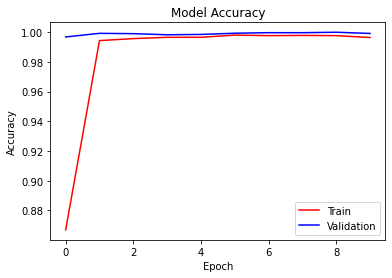

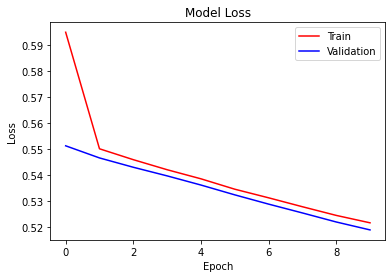

In [5]:
import numpy as np 
import pandas as pd
from keras.optimizers import SGD
from keras.preprocessing import image
from os.path import join
from PIL import Image
from scipy import misc
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Softmax, ZeroPadding2D
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Flatten, Dense, Dropout 
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam,SGD, RMSprop,Adadelta,Adagrad,Adamax
from sklearn.metrics import plot_confusion_matrix


train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(149, activation='softmax'))
model.add(Dense(units=2, activation="softmax"))
opt = Adam(lr=0.00001)
model.summary()

model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID)

#plot_confusion_matrix(model, train_generator, validation_genarator)  
#plt.show()  


model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(149, activation='softmax'))


plt.plot(history.history['accuracy'],color = 'red')
plt.plot(history.history['val_accuracy'],color = 'blue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'best')
plt.show()

plt.plot(history.history['loss'],color = 'red')
plt.plot(history.history['val_loss'],color = 'blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'best')
plt.show()




